# This notebook demonstrates: 
* failure of model to model reproducibility in the Izhikitich model eminating from parameter C (capacitance)

In [1]:
import numpy as np
import time

## Set up an appropriate environment.

* demonstrate that both backends work, before preceeding to a more specific backend versus backend results test/overlay.

In [2]:

import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neuronunit.models.reduced import ReducedModel
from neuronunit.optimization.model_parameters import model_params, path_params
from neuronunit.optimization import model_parameters as modelp

LEMS_MODEL_PATH = path_params['model_path']
import neuronunit.optimization as opt
import quantities as pq





# From OSB models
mparams = {}
mparams['a'] = 0.03
mparams['b'] = -2
mparams['C'] = 100
mparams['c'] = -50 
mparams['vr'] = -60
mparams['vt'] = -40
mparams['vPeak'] = 35
mparams['k'] = 0.7
mparams['d'] = 100


# A more specific Backend versus backend test/overlay.
Starting with default parameters, and agreement

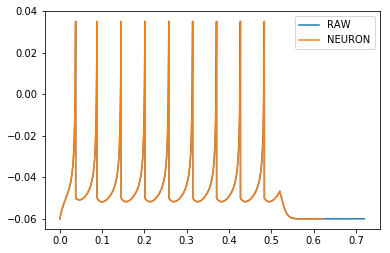

In [3]:

iparams = {}
iparams['injected_square_current'] = {}
iparams['injected_square_current']['amplitude'] = 120*pq.pA
DELAY = 0
DURATION = 520
iparams['injected_square_current']['delay'] = DELAY*pq.ms
iparams['injected_square_current']['duration'] = DURATION*pq.ms

model1 = None
model1 = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
model1.set_attrs(mparams)
model1.inject_square_current(iparams)

model2 = None
model2 = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('NEURON'))
#model2.set_attrs(mparams)
model2.inject_square_current(iparams)


plt.plot(model1.get_membrane_potential().times,model1.get_membrane_potential(),label='RAW')
plt.plot(model2.get_membrane_potential().times,model2.get_membrane_potential(),label='NEURON')
plt.legend()

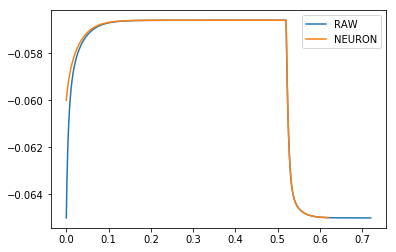

In [4]:

# From OSB models
mparams = {}
mparams['a'] = 0.03
mparams['b'] = -2
mparams['C'] = 100
mparams['c'] = -50 
mparams['vr'] = -60
mparams['vt'] = -40
mparams['vpeak'] = 35
mparams['k'] = 0.7
mparams['d'] = 100


# FROM the MOD file.
vanilla_NRN = {}
#vanilla_NRN['v0'] = -60# (mV)
vanilla_NRN['k'] = 7.0E-4# (uS / mV)
vanilla_NRN['vr'] = -60# (mV)
vanilla_NRN['vt'] = -40# (mV)
vanilla_NRN['vpeak'] = 35# (mV)
vanilla_NRN['a'] = 0.03# (kHz)
vanilla_NRN['b'] = -0.002# (uS)
vanilla_NRN['c'] = -50# (mV)
vanilla_NRN['d'] = 0.1# (nA)
vanilla_NRN['C'] = 1.0E-5# (microfarads)

m2m = {}
for k,v in vanilla_NRN.items():
    m2m[k] = vanilla_NRN[k]/mparams[k]


def translate(input_dic,m2m):
    input_dic['vpeak'] = input_dic['vPeak']
    input_dic.pop('vPeak', None)     
    input_dic.pop('dt', None)        
    for k,v in input_dic.items():
        input_dic[k] = v * m2m[k]
    return input_dic



model1 = None
model1 = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
mparams['C'] = 100
mparams['a'] = 0.06

#mparams['a'] = 0.03
mparams['b'] = -3
#mparams['C'] = 100
mparams['c'] = -55 
mparams['vr'] = -65
mparams['vt'] = -35
#mparams['vPeak'] = 45

mparams['vPeak'] = mparams['vpeak'] = 45
mparams['k'] = 0.8
mparams['d'] = 150



model1.set_attrs(mparams)
model1.inject_square_current(iparams)

model2 = None
model2 = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('NEURON'))
#mparams['vpeak'] = 35
#mparams['C'] = 2.0E-4
td = translate(mparams,m2m)

model2.set_attrs(td)
model2.inject_square_current(iparams)



plt.plot(model1.get_membrane_potential().times,model1.get_membrane_potential(),label='RAW')
plt.plot(model2.get_membrane_potential().times,model2.get_membrane_potential(),label='NEURON')
plt.legend()


## The problem is parameter C

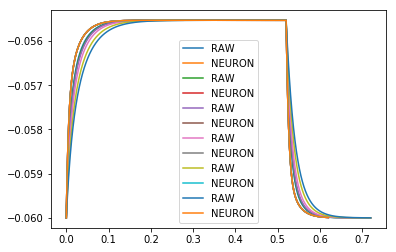

In [5]:

iparams = {}
iparams['injected_square_current'] = {}
iparams['injected_square_current']['amplitude'] = 60*pq.pA
DELAY = 0
DURATION = 520
iparams['injected_square_current']['delay'] = DELAY*pq.ms
iparams['injected_square_current']['duration'] = DURATION*pq.ms


for C in [150,160,170,200,250,300]:
    mparams['C'] = C
    mparams['a'] = 0.06

    mparams['b'] = -3
    mparams['c'] = -55 
    mparams['vr'] = -60
    mparams['vt'] = -35

    mparams['vPeak'] = 45
    mparams['k'] = 0.8
    mparams['d'] = 150

    model1 = None
    model1 = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
    model1.set_attrs(mparams)
    model1.inject_square_current(iparams)

    td = translate(mparams,m2m)

    model2.set_attrs(td)
    model2 = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('NEURON'))
    model2.set_attrs(mparams)
    model2.inject_square_current(iparams)


    plt.plot(model1.get_membrane_potential().times,model1.get_membrane_potential(),label='RAW')
    plt.plot(model2.get_membrane_potential().times,model2.get_membrane_potential(),label='NEURON')
plt.legend()
plt.show()

V0 and VR in NEURON is another problem, but it's not the problem. As when they are made to be the same problems persist

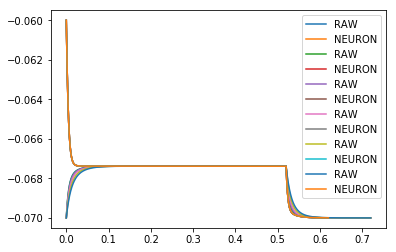

In [6]:
iparams = {}
iparams['injected_square_current'] = {}
iparams['injected_square_current']['amplitude'] = 60*pq.pA
DELAY = 0
DURATION = 520
iparams['injected_square_current']['delay'] = DELAY*pq.ms
iparams['injected_square_current']['duration'] = DURATION*pq.ms


for C in [150,160,170,200,250,300]:
    mparams['C'] = C
    mparams['a'] = 0.06

    mparams['b'] = -3
    mparams['c'] = -55 
    mparams['vr'] = -70
    mparams['vt'] = -35

    mparams['vPeak'] = 45
    mparams['k'] = 0.8
    mparams['d'] = 150

    model1 = None
    model1 = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
    model1.set_attrs(mparams)
    model1.inject_square_current(iparams)

    td = translate(mparams,m2m)

    model2.set_attrs(td)
    model2 = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('NEURON'))
    model2.set_attrs(mparams)
    model2.inject_square_current(iparams)


    plt.plot(model1.get_membrane_potential().times,model1.get_membrane_potential(),label='RAW')
    plt.plot(model2.get_membrane_potential().times,model2.get_membrane_potential(),label='NEURON')
plt.legend()
plt.show()

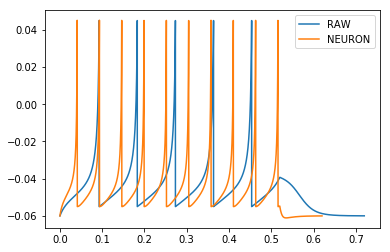

In [7]:

iparams = {}
iparams['injected_square_current'] = {}
iparams['injected_square_current']['amplitude'] = 155*pq.pA
DELAY = 0
DURATION = 520
iparams['injected_square_current']['delay'] = DELAY*pq.ms
iparams['injected_square_current']['duration'] = DURATION*pq.ms


#for C in [250]:
mparams['C'] = 250
mparams['a'] = 0.06

mparams['b'] = -3
mparams['c'] = -55 
mparams['vr'] = -60
mparams['vt'] = -35

mparams['vPeak'] = 45
mparams['k'] = 0.8
mparams['d'] = 150

model1 = None
model1 = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
model1.set_attrs(mparams)
model1.inject_square_current(iparams)

td = translate(mparams,m2m)

model2.set_attrs(td)
model2 = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('NEURON'))
model2.set_attrs(mparams)
model2.inject_square_current(iparams)


plt.plot(model1.get_membrane_potential().times,model1.get_membrane_potential(),label='RAW')
plt.plot(model2.get_membrane_potential().times,model2.get_membrane_potential(),label='NEURON')
plt.legend()
plt.show()

# A summary of NEURON backend units (left), versus NeuroML parameters right. 


NEURON units                                           NeuroML units   

v0 = -60 (mV),  vr = -60 (mV) ,                        mparams['vr'] = -60

k = 7.0E-4 (uS / mV),                                  mparams['k'] = 0.7                ***different

vt = -40 (mV)

vpeak = 35 (mV)                 mparams['vPeak'] = 35

a = 0.030000001 (kHz) [ms-1],   mparams['a'] = 0.03

b = -0.002 (uS),                mparams['b'] = -2  ***different   

c = -50 (mV),                   mparams['c'] = -50  

d = 0.1 (nA) --MATLAB pA        mparams['d'] = 100  ******** pA

C = 1.0E-4 (microfarads)        mparams['C'] = 100 ******** co faraday)

# A dictionary in code, that these model tests where based on.

In [8]:
import collections
# Fast spiking cannot be reproduced as it requires modifications to the standard Izhi equation,
# which are expressed in this mod file.
# https://github.com/OpenSourceBrain/IzhikevichModel/blob/master/NEURON/izhi2007b.mod

from collections import OrderedDict
type2007 = collections.OrderedDict([
  #              C    k     vr  vt vpeak   a      b   c    d  celltype
  ('RS',        (100, 0.7,  -60, -40, 35, 0.03,   -2, -50,  100,  1)),
  ('IB',        (150, 1.2,  -75, -45, 50, 0.01,   5, -56,  130,   2)),
  ('CH',        (50,  1.5,  -60, -40, 25, 0.03,   1, -40,  150,   3)),
  ('LTS',       (100, 1.0,  -56, -42, 40, 0.03,   8, -53,   20,   4)),
  ('FS',        (20,  1.0,  -55, -40, 25, 0.2,   -2, -45,  -55,   5)),
  ('TC',        (200, 1.6,  -60, -50, 35, 0.01,  15, -60,   10,   6)),
  ('TC_burst',  (200, 1.6,  -60, -50, 35, 0.01,  15, -60,   10,   6)),
  ('RTN',       (40,  0.25, -65, -45,  0, 0.015, 10, -55,   50,   7)),
  ('RTN_burst', (40,  0.25, -65, -45,  0, 0.015, 10, -55,   50,   7))])

import numpy as np
param_dict = OrderedDict([(k,[]) for k in ['C','k','vr','vt','vPeak','a','b','c','d']])
#OrderedDict
for i,k in enumerate(param_dict.keys()):
    for v in type2007.values():
        param_dict[k].append(v[i])

explore_param = {k:(np.min(v),np.max(v)) for k,v in param_dict.items()}
param_ranges = OrderedDict(explore_param)


#IB = mparams[param_dict['IB']]
IB = {}
TC = {}
CH = {}
RTN_burst = {}
for k,v in param_dict.items():
    IB[k] = v[1]
    CH[k] = v[2]
    TC[k] = v[5]
    RTN_burst[k] = v[-2]
    
RTN_burstN = copy.copy(RTN_burst)
TCN = copy.copy(TC)
IBN = copy.copy(IB)
CHN = copy.copy(CH)


# From OSB models
mparams = {}
mparams['a'] = 0.03
mparams['b'] = -2
mparams['C'] = 100
mparams['c'] = -50 
mparams['vr'] = -60
mparams['vt'] = -40
mparams['vpeak'] = 35
mparams['k'] = 0.7
mparams['d'] = 100


# FROM the MOD file.
vanilla_NRN = {}
#vanilla_NRN['v0'] = -60# (mV)
vanilla_NRN['k'] = 7.0E-4# (uS / mV)
vanilla_NRN['vr'] = -60# (mV)
vanilla_NRN['vt'] = -40# (mV)
vanilla_NRN['vpeak'] = 35# (mV)
vanilla_NRN['a'] = 0.03# (kHz)
vanilla_NRN['b'] = -0.002# (uS)
vanilla_NRN['c'] = -50# (mV)
vanilla_NRN['d'] = 0.1# (nA)
vanilla_NRN['C'] = 1.0E-4# (microfarads)

m2m = {}
for k,v in vanilla_NRN.items():
    m2m[k] = vanilla_NRN[k]/mparams[k]


def translate(input_dic,m2m):
    input_dic['vpeak'] = input_dic['vPeak']
    input_dic.pop('vPeak', None)     
    input_dic.pop('dt', None)        
    for k,v in input_dic.items():
        input_dic[k] = v * m2m[k]
    return input_dic
IBN = translate(IBN,m2m)
CHN = translate(CHN,m2m)
TCN = translate(TCN,m2m)
print(CH)
print(CHN)
print(IB)
print(IBN)
print(TC)
print(TCN)

{'vr': -60, 'vt': -40, 'a': 0.03, 'd': 150, 'c': -40, 'vPeak': 25, 'C': 50, 'b': 1, 'k': 1.5}
{'vr': -60.0, 'd': 0.15, 'a': 0.03, 'vpeak': 25.0, 'c': -40.0, 'vt': -40.0, 'C': 4.9999999999999996e-05, 'b': 0.001, 'k': 0.0015}
{'vr': -75, 'vt': -45, 'a': 0.01, 'd': 130, 'c': -56, 'vPeak': 50, 'C': 150, 'b': 5, 'k': 1.2}
{'vr': -75.0, 'd': 0.13, 'a': 0.01, 'vpeak': 50.0, 'c': -56.0, 'vt': -45.0, 'C': 0.00015, 'b': 0.005, 'k': 0.0012}
{'vr': -60, 'vt': -50, 'a': 0.01, 'd': 10, 'c': -60, 'vPeak': 35, 'C': 200, 'b': 15, 'k': 1.6}
{'vr': -60.0, 'd': 0.01, 'a': 0.01, 'vpeak': 35.0, 'c': -60.0, 'vt': -50.0, 'C': 0.00019999999999999998, 'b': 0.015, 'k': 0.0016}


The following cells follow the Backend pattern RAW, NEURON, RAW, NEURON.